<div style="width: 100%; height: 100px; background-color: #DBC7BE; border: 4px solid #0c2461; text-align: center; line-height: 100px; color: #0c2461; font-size: 24px; font-weight: bold; border-radius:6px;">
    Medicare Monthly Enrollment Methodology Analytics Project  🏥
</div>

<div style="width: 100%; background-color: #DBC7BE; color: #0c2461; padding: 10px; border: 3px solid #0c2461; font-size: 15px;margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #0c2461;">Project Description</h3>
    The Medicare Monthly Enrollment data file presents Medicare monthly and yearly enrollee counts by geographic area (state/territory and county) from calendar year 2013 to calendar year 2022. 
    <span>
    </span>
    <h4 style="color: #0c2461;">The file includes counts for the following:</h4>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Total Medicare beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Original Medicare beneficiaries (i.e. Fee-for-Service)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Medicare Advantage & other health plan beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Aged beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Disabled beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Total Part D (prescription drug) beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Stand-Alone Prescription Drug Plan beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Medicare Advantage Prescription Drug Plan beneficiaries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Part D Low-income subsidy beneficiaries</li>
    </ul>
The yearly Medicare enrollee counts are determined using a person-year methodology. For each 
calendar year, total person-year counts are determined by summing the total number of months that 
each beneficiary is enrolled during the year and dividing by 12. Using this methodology, a beneficiary’s 
partial-year enrollment may be counted in more than 1 category (i.e., entitlement type, health care 
delivery, plan type, and low-income subsidy eligibility category). 
The monthly counts represent Medicare beneficiaries enrolled in the given month
<span>
</span> 
    <h3 style="color: #0c2461;">Tasks in this notebook</h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Import libraries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Read dataset and get information from data</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Cleaning Dataset</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Features</li>
        <li>
            <span style="margin-left: -10px;">&#8226;</span> Modeling
            <ul style="list-style-type: none; padding-left: 20px;">
                <li><span style="margin-left: -10px;">&#8226;</span> Logestic Regression</li>
                <li><span style="margin-left: -10px;">&#8226;</span> Complement Naive Bayes (CNB)</li>
                <li><span style="margin-left: -10px;">&#8226;</span> KNN (K-Nearest Neighbors)</li>
                <li><span style="margin-left: -10px;">&#8226;</span> Decision Tree classifier</li>
                <li><span style="margin-left: -10px;">&#8226;</span> Random Forest classifier</li>
            </ul>
        </li>
    </ul>
</div>

<h2 style="position: relative;">
    <span style="color: #0c2461;">Dataset Overview</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #6a89cc;">
</h2>


<h2 style="position: relative;">
    <span style="color: #6a89cc;">1.</span> 
    <span style="color: #0c2461;">Libraries and Warnings</span> 
    <br/>
</h2>

<h2 style="position: relative;">
    <span style="color: #6a89cc;">1.1</span> 
    <span style="color: #0c2461;">Import Libraries</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #6a89cc;">
</h2>

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import pyplot as pllt
import seaborn as sns

<h2 style="position: relative;">
    <span style="color: #6a89cc;">1.2</span> 
    <span style="color: #0c2461;">Ignore warnings</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #6a89cc;">
</h2>


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

<h2 style="position: relative;">
    <span style="color: #6a89cc;">2.</span> 
    <span style="color: #0c2461;">Read dataset and get information from data</span> 
    <br/>
</h2>


<h2 style="position: relative;">
    <span style="color: #6a89cc;">2.1.</span> 
    <span style="color: #0c2461;">Read Dataset</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #6a89cc;">
</h2>


In [4]:
# Path of the file to read
filepath = "/kaggle/input/medicare-monthly-enrollment-data/Medicare Monthly Enrollment Data_August 2023.csv"
#data=pd.read_csv(filepath,index_col="YEAR", parse_dates=True, encoding='Windows-1252')
data=pd.read_csv(filepath, parse_dates=True, encoding='Windows-1252')
# importing the required library

In [5]:
data.head(3)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,857619.0,647647.0,209972.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2,2013,Year,County,AL,Alabama,Autauga,01001,9323.0,6484.0,2840.0,...,8708.0,5868.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0


<h2 style="position: relative;">
    <span style="color: #6a89cc;">2.2.</span> 
    <span style="color: #0c2461;">information about Datasets</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #6a89cc;">
</h2>

In [6]:
row, col = data.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 460290 rows and 26 columns.


In [7]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460290 entries, 0 to 460289
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          460290 non-null  int64 
 1   MONTH                                         460290 non-null  object
 2   BENE_GEO_LVL                                  460290 non-null  object
 3   BENE_STATE_ABRVTN                             460290 non-null  object
 4   BENE_STATE_DESC                               460290 non-null  object
 5   BENE_COUNTY_DESC                              460290 non-null  object
 6   BENE_FIPS_CD                                  460290 non-null  object
 7   TOT_BENES                                     460290 non-null  object
 8   ORGNL_MDCR_BENES                              460290 non-null  object
 9   MA_AND_OTH_BENES                              460290 non-nu

In [8]:
data.describe(include = "object")

,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
count,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,...,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290
unique,13,3,59,59,1931,3338,79910,64457,50211,74222,...,76732,60221,50152,68994,52106,47287,34782,11266,6931,59910
top,January,County,TX,Texas,Total,,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
freq,36690,452148,35328,35328,8004,276,7518,15439,15439,10483,...,7544,15444,15444,7656,22727,22727,9675,85130,85130,9675


<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">Most of the columns have object datatype. Conversion is required from object type to Integer for all columns which have counts of beneficiaries.</h5>

<h3 style="color: #0c2461;">Few more observations</h3>
<h5 style="color: #0c2461;">The columns have values like "*". This should be replaced by 0. Conversion is required from object type to Integer for all columns which have counts of beneficiaries.</h5>

In [9]:
# get all the unique values in the 'TOT_BENS' column
Total_ben = data['TOT_BENES'].unique()

# sort them alphabetically and then take a closer look
Total_ben.sort()
Total_ben

array(['*', '0.0', '100.0', ..., '99994.0', '99995.0', '99997.0'],
      dtype=object)

In [10]:
data["TOT_BENES"].isin(["*"]).sum()

7518

In [11]:
data["DSBLD_TOT_BENES"].isin(["*"]).sum()

10483

In [12]:
data["ORGNL_MDCR_BENES"].isin(["*"]).sum()

15439

In [13]:
data["AGED_TOT_BENES"].isin(["*"]).sum()

10483

In [14]:
data["MA_AND_OTH_BENES"].isin(["*"]).sum()

15439

In [15]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:26]

YEAR                                            0
MONTH                                           0
BENE_GEO_LVL                                    0
BENE_STATE_ABRVTN                               0
BENE_STATE_DESC                                 0
BENE_COUNTY_DESC                                0
BENE_FIPS_CD                                    0
TOT_BENES                                       0
ORGNL_MDCR_BENES                                0
MA_AND_OTH_BENES                                0
AGED_TOT_BENES                                  0
AGED_ESRD_BENES                                 0
AGED_NO_ESRD_BENES                              0
DSBLD_TOT_BENES                                 0
DSBLD_ESRD_AND_ESRD_ONLY_BENES                  0
DSBLD_NO_ESRD_BENES                             0
A_B_TOT_BENES                                   0
A_B_ORGNL_MDCR_BENES                            0
A_B_MA_AND_OTH_BENES                            0
PRSCRPTN_DRUG_TOT_BENES                         0


<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">No missing values in the dataset.</h5>

<h2 style="position: relative;">
    <span style="color: #6a89cc;">3.</span> 
    <span style="color: #0c2461;">Cleaning the Dataset</span> 
    <br/>
</h2>


In [16]:
data['TOT_BENES'] = pd.to_numeric(data['TOT_BENES'], errors='coerce').fillna(0).astype(int) 
data['DSBLD_TOT_BENES'] = pd.to_numeric(data['DSBLD_TOT_BENES'], errors='coerce').fillna(0).astype(int) 
data['AGED_TOT_BENES'] = pd.to_numeric(data['AGED_TOT_BENES'], errors='coerce').fillna(0).astype(int) 
data['ORGNL_MDCR_BENES'] = pd.to_numeric(data['ORGNL_MDCR_BENES'], errors='coerce').fillna(0).astype(int) 
data['MA_AND_OTH_BENES'] = pd.to_numeric(data['MA_AND_OTH_BENES'], errors='coerce').fillna(0).astype(int) 

In [17]:
## remove all the rows that contain a missing value
#nfl_data.dropna()
#df.replace('*', pd.NA, inplace=True)

In [18]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460290 entries, 0 to 460289
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          460290 non-null  int64 
 1   MONTH                                         460290 non-null  object
 2   BENE_GEO_LVL                                  460290 non-null  object
 3   BENE_STATE_ABRVTN                             460290 non-null  object
 4   BENE_STATE_DESC                               460290 non-null  object
 5   BENE_COUNTY_DESC                              460290 non-null  object
 6   BENE_FIPS_CD                                  460290 non-null  object
 7   TOT_BENES                                     460290 non-null  int64 
 8   ORGNL_MDCR_BENES                              460290 non-null  int64 
 9   MA_AND_OTH_BENES                              460290 non-nu

<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">Conversion done for the specified columns from object type to Integer.</h5>

In [19]:
#column to list 
data.columns.tolist()

['YEAR',
 'MONTH',
 'BENE_GEO_LVL',
 'BENE_STATE_ABRVTN',
 'BENE_STATE_DESC',
 'BENE_COUNTY_DESC',
 'BENE_FIPS_CD',
 'TOT_BENES',
 'ORGNL_MDCR_BENES',
 'MA_AND_OTH_BENES',
 'AGED_TOT_BENES',
 'AGED_ESRD_BENES',
 'AGED_NO_ESRD_BENES',
 'DSBLD_TOT_BENES',
 'DSBLD_ESRD_AND_ESRD_ONLY_BENES',
 'DSBLD_NO_ESRD_BENES',
 'A_B_TOT_BENES',
 'A_B_ORGNL_MDCR_BENES',
 'A_B_MA_AND_OTH_BENES',
 'PRSCRPTN_DRUG_TOT_BENES',
 'PRSCRPTN_DRUG_PDP_BENES',
 'PRSCRPTN_DRUG_MAPD_BENES',
 'PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES',
 'PRSCRPTN_DRUG_FULL_LIS_BENES',
 'PRSCRPTN_DRUG_PARTIAL_LIS_BENES',
 'PRSCRPTN_DRUG_NO_LIS_BENES']

In [20]:
data["TOT_BENES"].isin(["*"]).sum()

0

In [21]:
data["ORGNL_MDCR_BENES"].isin(["*"]).sum()

0

In [22]:
print(data.columns)

Index(['YEAR', 'MONTH', 'BENE_GEO_LVL', 'BENE_STATE_ABRVTN', 'BENE_STATE_DESC',
       'BENE_COUNTY_DESC', 'BENE_FIPS_CD', 'TOT_BENES', 'ORGNL_MDCR_BENES',
       'MA_AND_OTH_BENES', 'AGED_TOT_BENES', 'AGED_ESRD_BENES',
       'AGED_NO_ESRD_BENES', 'DSBLD_TOT_BENES',
       'DSBLD_ESRD_AND_ESRD_ONLY_BENES', 'DSBLD_NO_ESRD_BENES',
       'A_B_TOT_BENES', 'A_B_ORGNL_MDCR_BENES', 'A_B_MA_AND_OTH_BENES',
       'PRSCRPTN_DRUG_TOT_BENES', 'PRSCRPTN_DRUG_PDP_BENES',
       'PRSCRPTN_DRUG_MAPD_BENES',
       'PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES',
       'PRSCRPTN_DRUG_FULL_LIS_BENES', 'PRSCRPTN_DRUG_PARTIAL_LIS_BENES',
       'PRSCRPTN_DRUG_NO_LIS_BENES'],
      dtype='object')


In [23]:
data_flt = pd.DataFrame(data,columns = ['YEAR', 'TOT_BENES','AGED_TOT_BENES', 'DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES']) 
data_flt.head(2)

,YEAR,TOT_BENES,AGED_TOT_BENES,DSBLD_TOT_BENES,PRSCRPTN_DRUG_TOT_BENES
0,2013,52425659,43761388,8664271,35679758
1,2013,921477,698720,222758,637247.0


In [24]:
#data['YEAR'] = pd.to_numeric(data['YEAR']).astype(str) 
#options = ['2021' ,'2022'] # Last 2 years of data
options = ['2022'] # Current year data

df1 = data[data['BENE_COUNTY_DESC'] == "Total"]
df_cy = df1[(df1['MONTH'] == "Year") & (df1['BENE_STATE_DESC'] != "National") & (df1['YEAR'].isin(options))]
##df_cy = df2[df2['YEAR'].str.contains('2022')]  #Current year
##df[df['Credit-Rating'].str.contains('Fair')] 
df3 = df1[(df1['MONTH'] == "Year") & (df1['BENE_STATE_DESC'] == "National") ]

In [25]:
df_cy.head(10)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES


In [26]:
row, col = df_cy.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 0 rows and 26 columns.


In [27]:
row, col = df3.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 10 rows and 26 columns.


In [28]:
df3.head(10)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
43355,2014,Year,National,US,National,Total,,54013038,37790373,16222665,...,49073941,32876249,16197692,37720840,23437148,14283691,10313537,1051834.0,401548.0,25953921
86710,2015,Year,National,US,National,Total,,55496222,38025274,17470948,...,50414746,32969578,17445168,39505335,24092868,15412467,10643165,1077947.0,406304.0,27377918
130065,2016,Year,National,US,National,Total,,56981183,38610384,18370800,...,51743591,33393261,18350330,41203627,24831079,16372548,10915488,1086468.0,413970.0,28787701
173420,2017,Year,National,US,National,Total,,58457244,38667830,19789414,...,53008234,33242085,19766149,42728443,25243684,17484759,10856130,1014289.0,383811.0,30474213
216775,2018,Year,National,US,National,Total,,59989883,38665082,21324800,...,54349822,33052639,21297184,44249461,25563945,18685516,11374106,1103901.0,406367.0,31365087
260130,2019,Year,National,US,National,Total,,61514510,38577012,22937498,...,55653848,32758741,22895108,45827091,25583137,20243954,11555190,1094264.0,410245.0,32767391
303498,2020,Year,National,US,National,Total,,62840267,37776345,25063922,...,56966865,31934411,25032454,47413121,25171949,22241173,11655477,1112043.0,371211.0,34274390
346866,2021,Year,National,US,National,Total,,63892626,36356380,27536246,...,58041288,30537829,27503460,48818849,24164736,24654113,11711263,1108918.0,323250.0,35675418
390234,2022,Year,National,US,National,Total,,65116503,35288227,29828276,...,59108664,29327793,29780871,50295753,23400805,26894947,12231254,1050008.0,284815.0,36729676


In [29]:
numerical_columns = list(df3.loc[:,['TOT_BENES', 'AGED_TOT_BENES', 'DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES']])

In [30]:
df_numerical = df3[numerical_columns] 

In [31]:
df_numerical.head(5)

,TOT_BENES,AGED_TOT_BENES,DSBLD_TOT_BENES,PRSCRPTN_DRUG_TOT_BENES
0,52425659,43761388,8664271,35679758
43355,54013038,45216665,8796373,37720840
86710,55496222,46630952,8865269,39505335
130065,56981183,48143217,8837966,41203627
173420,58457244,49678033,8779211,42728443


In [32]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format

In [33]:
df3.head(20)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,DSBLD_NO_ESRD_BENES,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,43761388,234590.0,43526798,8664271,243169.0,8421102.0,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
43355,2014,Year,National,US,National,Total,,54013038,37790373,16222665,45216665,245705.0,44970960,8796373,249051.0,8547322.0,49073941,32876249,16197692,37720840,23437148,14283691,10313537,1051834.0,401548.0,25953921
86710,2015,Year,National,US,National,Total,,55496222,38025274,17470948,46630952,258350.0,46372603,8865269,254536.0,8610733.0,50414746,32969578,17445168,39505335,24092868,15412467,10643165,1077947.0,406304.0,27377918
130065,2016,Year,National,US,National,Total,,56981183,38610384,18370800,48143217,269019.0,47874199,8837966,256347.0,8581619.0,51743591,33393261,18350330,41203627,24831079,16372548,10915488,1086468.0,413970.0,28787701
173420,2017,Year,National,US,National,Total,,58457244,38667830,19789414,49678033,278642.0,49399391,8779211,258366.0,8520845.0,53008234,33242085,19766149,42728443,25243684,17484759,10856130,1014289.0,383811.0,30474213
216775,2018,Year,National,US,National,Total,,59989883,38665082,21324800,51303898,290243.0,51013655,8685985,261246.0,8424739.0,54349822,33052639,21297184,44249461,25563945,18685516,11374106,1103901.0,406367.0,31365087
260130,2019,Year,National,US,National,Total,,61514510,38577012,22937498,52991455,301798.0,52689658,8523055,262179.0,8260876.0,55653848,32758741,22895108,45827091,25583137,20243954,11555190,1094264.0,410245.0,32767391
303498,2020,Year,National,US,National,Total,,62840267,37776345,25063922,54531919,305080.0,54226839,8308348,255949.0,8052399.0,56966865,31934411,25032454,47413121,25171949,22241173,11655477,1112043.0,371211.0,34274390
346866,2021,Year,National,US,National,Total,,63892626,36356380,27536246,55851321,305227.0,55546095,8041304,248871.0,7792434.0,58041288,30537829,27503460,48818849,24164736,24654113,11711263,1108918.0,323250.0,35675418
390234,2022,Year,National,US,National,Total,,65116503,35288227,29828276,57362936,311070.0,57051865,7753567,244565.0,7509003.0,59108664,29327793,29780871,50295753,23400805,26894947,12231254,1050008.0,284815.0,36729676


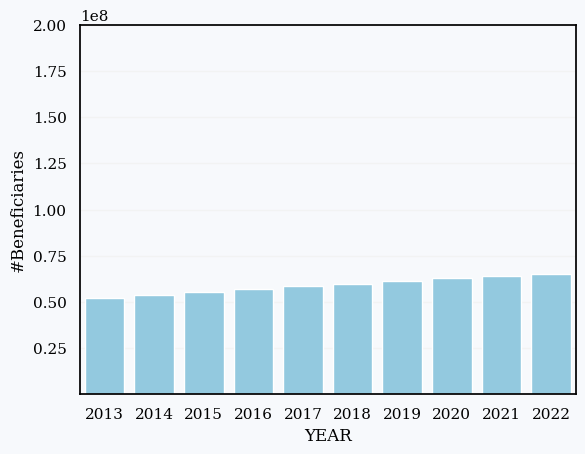

In [34]:
# Creating the figure and primary axis
fig, ax1 = plt.subplots()
sns.barplot(x=df3["YEAR"], y=df3["TOT_BENES"] ,ax=ax1, color='skyblue')
ax1.set_ylabel('#Beneficiaries')
plt.ylim(100000, 200000000)
plt.show()

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8004 entries, 0 to 460289
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   YEAR                                          8004 non-null   int64 
 1   MONTH                                         8004 non-null   object
 2   BENE_GEO_LVL                                  8004 non-null   object
 3   BENE_STATE_ABRVTN                             8004 non-null   object
 4   BENE_STATE_DESC                               8004 non-null   object
 5   BENE_COUNTY_DESC                              8004 non-null   object
 6   BENE_FIPS_CD                                  8004 non-null   object
 7   TOT_BENES                                     8004 non-null   int64 
 8   ORGNL_MDCR_BENES                              8004 non-null   int64 
 9   MA_AND_OTH_BENES                              8004 non-null   int64 
 10  AGE

In [36]:
df1.head(10)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,DSBLD_NO_ESRD_BENES,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,43761388,234590.0,43526798,8664271,243169.0,8421102.0,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477,711448,210029,698720,4134.0,694586.0,222758,5315.0,217442.0,857619.0,647647.0,209972.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
70,2013,Year,State,AK,Alaska,Total,02,76224,75676,549,63712,252.0,63460.0,12512,329.0,12183.0,67025.0,66477.0,548.0,30486.0,30082.0,404.0,15994.0,973.0,228.0,13290.0
101,2013,Year,State,AZ,Arizona,Total,04,1050128,658948,391180,898705,4459.0,894246.0,151422,4581.0,146842.0,957635.0,566552.0,391083.0,707683.0,331320.0,376363.0,176167.0,12562.0,7280.0,511674.0
118,2013,Year,State,AR,Arkansas,Total,05,572713,467399,105315,438855,1933.0,436922.0,133859,2409.0,131450.0,534145.0,428836.0,105309.0,376185.0,280432.0,95753.0,127593.0,16226.0,6904.0,225462.0
195,2013,Year,State,CA,California,Total,06,5300177,3318396,1981781,4582391,29592.0,4552799.0,717786,27963.0,689823.0,4711715.0,2732619.0,1979096.0,3933310.0,2006290.0,1927020.0,1285813.0,78233.0,26404.0,2542860.0
255,2013,Year,State,CO,Colorado,Total,08,721035,468492,252542,620821,2193.0,618628.0,100214,2383.0,97831.0,648783.0,397756.0,251027.0,453365.0,222496.0,230869.0,96463.0,15529.0,4807.0,336565.0
321,2013,Year,State,CT,Connecticut,Total,09,608512,467291,141221,526964,2318.0,524647.0,81548,1951.0,79597.0,544825.0,403614.0,141211.0,416404.0,283712.0,132693.0,155163.0,2946.0,613.0,257683.0
331,2013,Year,State,DE,Delaware,Total,10,167686,155803,11883,141355,845.0,140510.0,26332,825.0,25506.0,154834.0,142956.0,11878.0,115727.0,105368.0,10359.0,26346.0,2380.0,1407.0,85594.0
336,2013,Year,State,DC,District of Columbia,Total,11,83964,74946,9018,69193,850.0,68343.0,14771,1015.0,13757.0,68000.0,59062.0,8938.0,45597.0,36885.0,8712.0,28881.0,853.0,156.0,15708.0


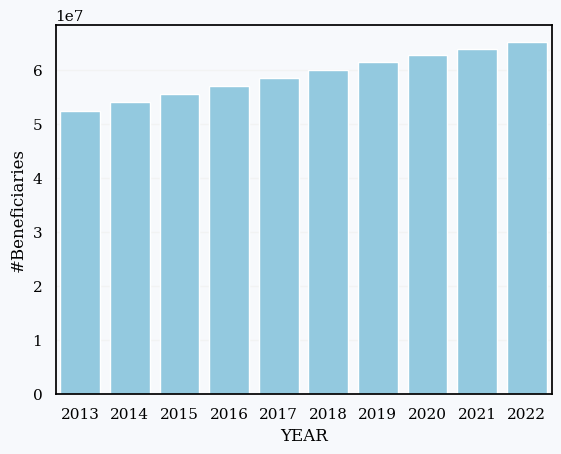

In [37]:
# Creating the figure and primary axis
fig, ax1 = plt.subplots()
sns.barplot(x=df3['YEAR'], y=df3['TOT_BENES'], data=df3, ax=ax1, color='skyblue')
ax1.set_ylabel('#Beneficiaries')
plt.show()

In [38]:
options = ['2022'] # Current year data
df_cy = data[(data['YEAR'].isin(options))]

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 390234
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   YEAR                                          10 non-null     int64 
 1   MONTH                                         10 non-null     object
 2   BENE_GEO_LVL                                  10 non-null     object
 3   BENE_STATE_ABRVTN                             10 non-null     object
 4   BENE_STATE_DESC                               10 non-null     object
 5   BENE_COUNTY_DESC                              10 non-null     object
 6   BENE_FIPS_CD                                  10 non-null     object
 7   TOT_BENES                                     10 non-null     int64 
 8   ORGNL_MDCR_BENES                              10 non-null     int64 
 9   MA_AND_OTH_BENES                              10 non-null     int64 
 10  AGED_

In [40]:
data.shape

(460290, 26)

In [41]:
df_cy.head(5)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,DSBLD_NO_ESRD_BENES,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES


<Axes: xlabel='YEAR', ylabel='TOT_BENES'>

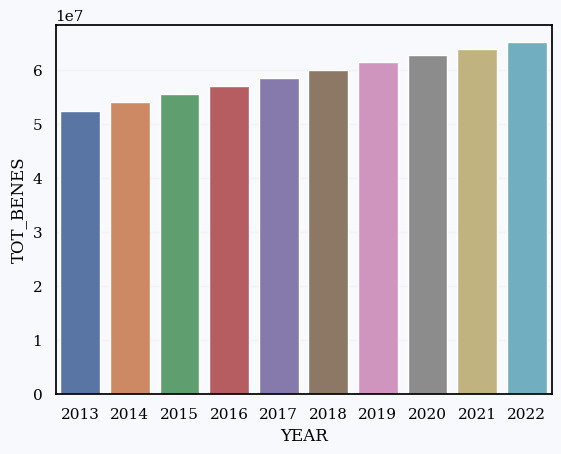

In [42]:
df3['YEAR'] = pd.to_numeric(df3['YEAR']).astype(int)
#sns.barplot(x=df3['YEAR'], y=df3['TOT_BENES'])
sns.barplot(x=df3['YEAR'], y=df3['TOT_BENES'])

In [43]:
#we're choosing the important columns that may give us meaningful results
imp_col = ['TOT_BENES','AGED_TOT_BENES','DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES']
merged_details=df1
numerical_merged_cols = merged_details[imp_col]
numerical_merged_cols.describe()

,TOT_BENES,AGED_TOT_BENES,DSBLD_TOT_BENES
count,"8,004.00","8,004.00","8,004.00"
mean,"2,050,967.16","1,758,986.62","291,980.55"
std,"7,715,317.96","6,630,868.78","1,094,593.35"
min,"1,836.00","1,501.00",335.00
25%,"285,351.50","243,330.50","35,468.00"
50%,"732,446.00","601,463.50","118,840.00"
75%,"1,334,662.25","1,138,092.25","204,125.00"
max,"66,338,178.00","58,759,355.00","9,095,609.00"


In [44]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = df_cy[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']
    
    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)
    
    # Count Plot
    sns.countplot(data=df_cy, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9,color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()



In [45]:
import plotly.graph_objs as go
go.Figure(
    data=[go.Histogram(x=df_numerical["TOT_BENES"], xbins={"start": 100000, "end": 90000000, "size": 200000})],
    layout=go.Layout(title="Histogram of Total Beneficiaries", yaxis={"title": "Count"}, bargap=0.05),
    )

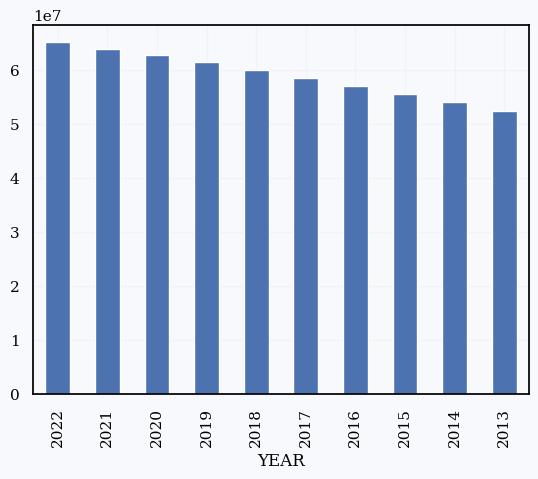

In [46]:
import matplotlib.pyplot as plt
df3.groupby('YEAR')['TOT_BENES'].max().sort_values(ascending=False).plot(kind='bar')
plt.xlabel='YEAR'
plt.ylabel='Beneficiaries'
plt.show()

In [47]:
df3.groupby('YEAR')['TOT_BENES'].sum()


YEAR
2013    52425659
2014    54013038
2015    55496222
2016    56981183
2017    58457244
2018    59989883
2019    61514510
2020    62840267
2021    63892626
2022    65116503
Name: TOT_BENES, dtype: int64